Project FILIÈRE RECHERCHE

Under the supervision of :

Elisabeth Lahalle

Students :

- Ricardo Chiquetto do Lago
- Maxsuel Fernandes de Almeida
- Samara Ndiaye
- Ana Cecilia Reghini
- Lucas Tramonte

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

# Data

In [2]:
data_gamma_irradiation = pd.read_csv("Assets/Data/2015_months_DebitDoseA.csv")
data_hygometry = pd.read_csv("Assets/Data/2015_months_HYGR.csv")
data_patm = pd.read_csv("Assets/Data//2015_months_PATM.csv")
data_temp = pd.read_csv("Assets//Data//2015_months_TEMP.csv")

In [3]:
#data_gamma_irradiation

# Data Visualization

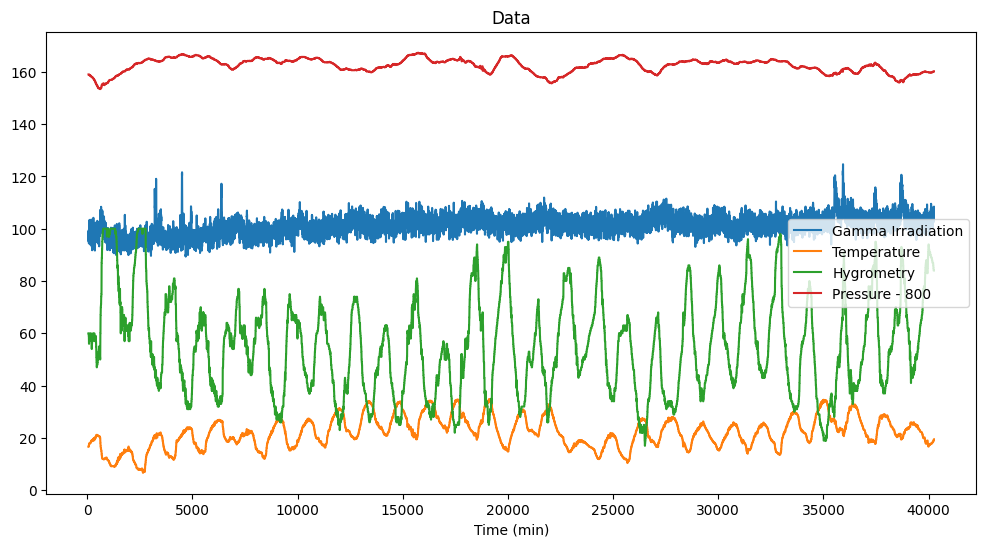

In [4]:
# Define the month (1: February, 2: April, 3: June, 4: October)
month = 3  # selected month: June

# Extract data for the selected month
sigg = data_gamma_irradiation.iloc[:, month-1]  # Gamma irradiation data
sigt = data_temp.iloc[:, month-1]               # Temperature data
sigh = data_hygometry.iloc[:, month-1]          # Hygrometry data
sigp = data_patm.iloc[:, month-1]               # Atmospheric pressure data

# Remove the first and last hour of data
N = len(sigg)  # number of data points
fe = 1/60      # sampling frequency
t = list(range(N))  # time vector

Nh = 60  # 1 hour
t_trimmed = t[Nh:N-Nh]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(t_trimmed, sigg[Nh:N-Nh], label='Gamma Irradiation')
plt.plot(t_trimmed, sigt[Nh:N-Nh], label='Temperature')
plt.plot(t_trimmed, sigh[Nh:N-Nh], label='Hygrometry')
plt.plot(t_trimmed, sigp[Nh:N-Nh] - 800, label='Pressure - 800')

plt.xlabel('Time (min)')
plt.title('Data')
plt.legend()
plt.show()


## Ploting the 5 months

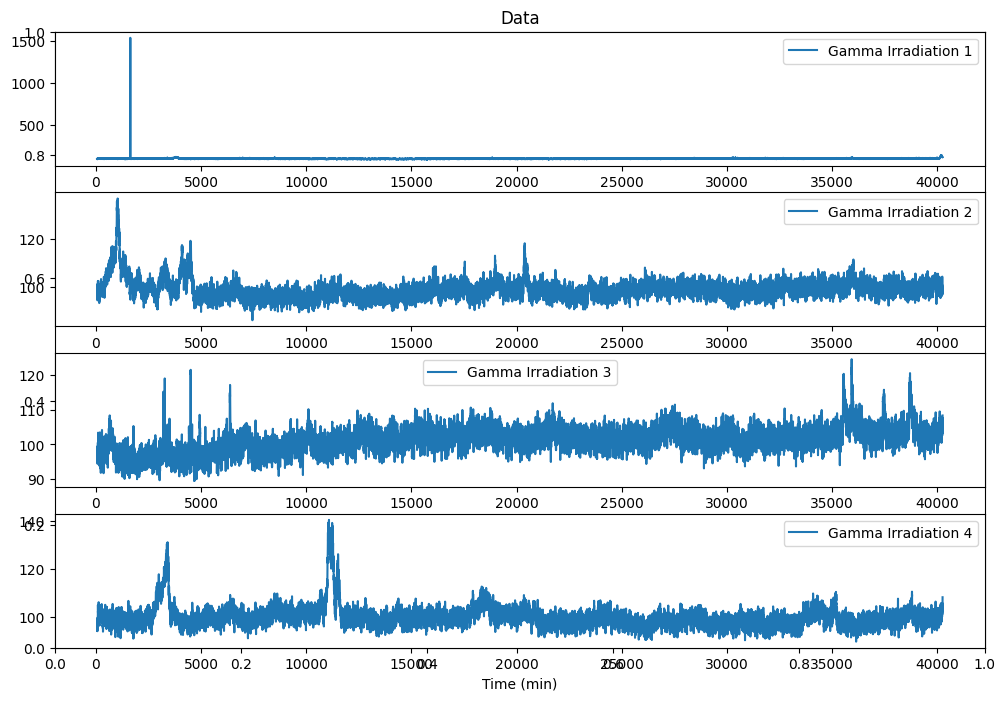

In [5]:
plt.figure(figsize=(12, 8))
plt.title('Data')

for i in range(4):
    plt.subplot(4, 1, i+1)

    # Remove the first and last hour of data
    Nh = 60  # 1 hour
    t_trimmed = t[Nh:N-Nh]

    # Plot the data
    plt.plot(t_trimmed, data_gamma_irradiation.iloc[:, i][Nh:N-Nh], label=f'Gamma Irradiation {i+1}')
    plt.legend()
    
plt.xlabel('Time (min)')


plt.show()


## SDT method to detect collectif motifs

In [6]:
def compute_moving_mean(signal, window_size):
    return signal.rolling(window=window_size, min_periods=1).mean()

def compute_moving_std(signal, window_size):
    return signal.rolling(window=window_size, min_periods=1).std()


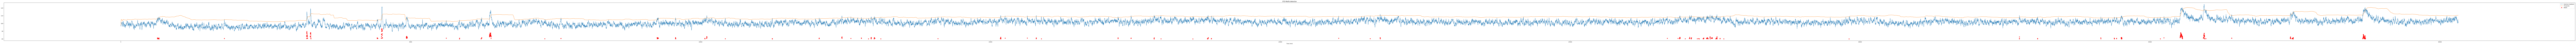

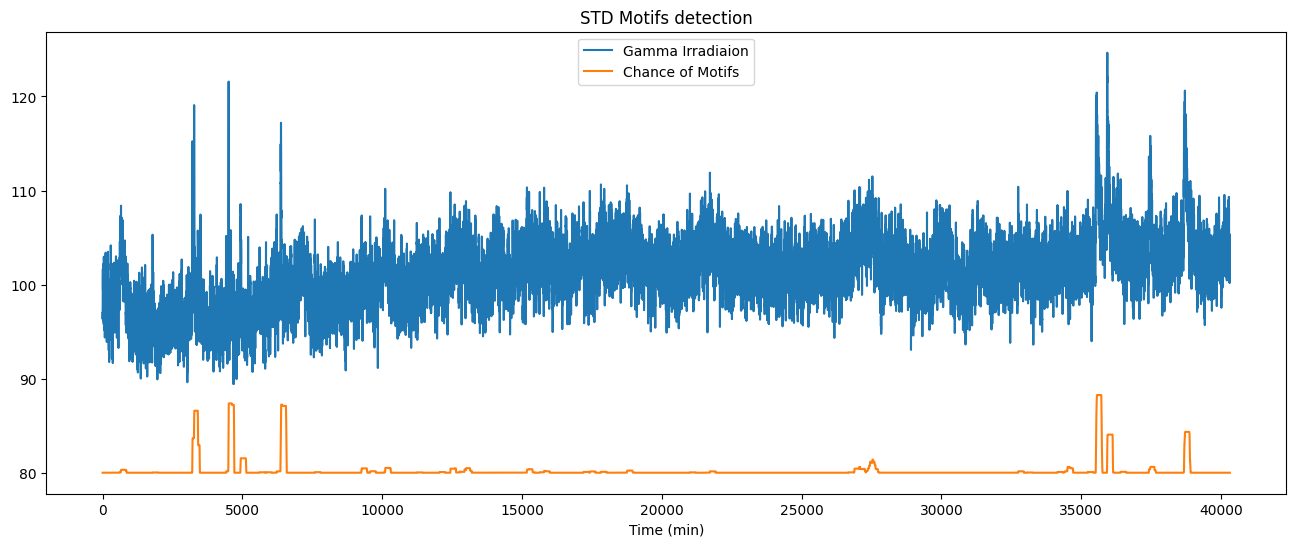

In [27]:
signal = sigg  # Select the signal points
time = t  # Select the time points

lw = 400  # Window length for moving standard deviation (75)
n = 10  # Window length multiplyer for moving mean

# Step 1: Compute the moving mean with window size n*lw
moving_mean = compute_moving_mean(signal, window_size=n*lw)

# Step 2: Compute the moving standard deviation with window size lw
moving_std = compute_moving_std(signal, window_size=lw)

# Step 3: Compute the threshold as moving_mean + 3 * moving_std
threshold = moving_mean + 3 * moving_std

# Step 4: Find points in the signal that exceed the threshold
dif = signal - threshold
dif[dif < 0] = 0

# Step 5: Motifs detection
dif_mean = compute_moving_mean(dif, 200)*10
th = 0 # Threshold of dif for motifs
motifs = signal[dif > th]
plotable_dif = dif[dif > th]
    
# Plot the data
plt.figure(figsize=(400, 6))
plt.plot(time, signal, label='Gamma Irradiaion')
#plt.plot(time, moving_mean, label='Moving Mean')
plt.plot(time, threshold, label='Threshold')
#plt.plot(motifs, 'ro', label='Motifs')
plt.plot(80 + plotable_dif, 'ro', label='Motifs')
plt.xlabel('Time (min)')
plt.title('STD Motifs detection')
plt.legend()

plt.figure(figsize=(16, 6))
plt.plot(time, signal, label='Gamma Irradiaion')
#plt.plot(time, moving_mean, label='Moving Mean')
#plt.plot(time, threshold, label='Threshold')
#plt.plot(motifs, 'ro', label='Motifs')
#plt.plot(plotable_dif+80, 'ro', label='Motifs')
plt.plot(time, dif_mean+80, label='Chance of Motifs')
plt.xlabel('Time (min)')
plt.title('STD Motifs detection')
plt.legend()

# LSTMs